<a href="https://colab.research.google.com/github/Gursewak-S/Advance-Python/blob/main/Remove_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/newplacementdata.csv")

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [ ]:
# even = (n/2)+ ((n/2)+1))/2
# odd = (n/2)+1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: xlabel='placement_exam_marks'>

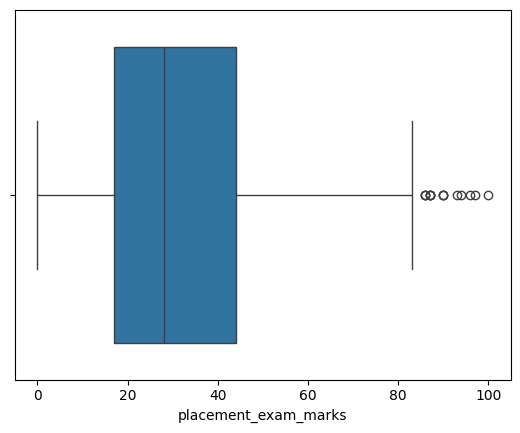

In [ ]:
sns.boxplot(x= df['placement_exam_marks'])

In [ ]:
# Finding the IQR

percentile25 = df[ 'placement_exam_marks'].quantile(0.25)
percentile75 = df[ 'placement_exam_marks'].quantile(0.75)

In [ ]:
percentile25

np.float64(17.0)

In [ ]:
percentile75

np.float64(44.0)

In [ ]:
IQR = percentile75 - percentile25
IQR

np.float64(27.0)

In [ ]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(84.5)

In [ ]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-23.5)

# Finding Our Outliers

In [ ]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [ ]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [ ]:
# Trimming  ----> 4(Lower).....1, upper (25).... (50) ==> here 1,50 are outliers --->
# Lower (4) <----› upper(25) mid data .

# Capping -..-› 4(Lower)....1, upper (25)..... (50) ---› capping Lower point Lowest point(1)
# upper point upper point(50) ---> Range expand ...› outliers remove .

In [ ]:
# Trimming (outlier Removing techniques 1)

In [ ]:
newdf = df[df['placement_exam_marks'] > upper_limit]

In [ ]:
newdf

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [ ]:
# comparison

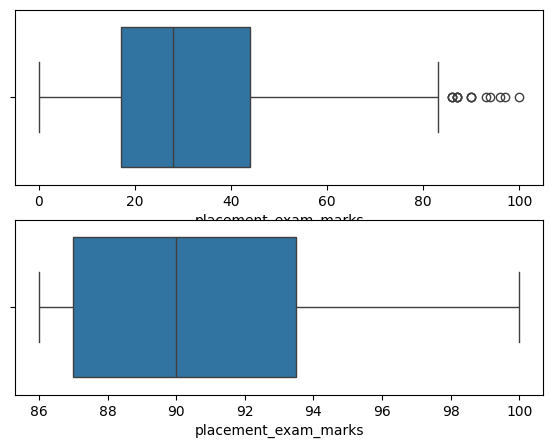

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot (222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot (224)
sns.boxplot(x = newdf['placement_exam_marks'])
plt.show()

In [ ]:
# capping (Outlier Removing technique 2)

In [ ]:
new_df_cap = df.copy()

In [ ]:
# min = 5 ,  max 15

# min 4 , 3, 1
# max = 20 ,30 , 50

# updated min_value = 1
# updated_max_value = 50

In [ ]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit ,
    upper_limit ,

    np.where(
    new_df_cap['placement_exam_marks'] < lower_limit,
    lower_limit ,
    new_df_cap['placement_exam_marks'])
)

In [ ]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
new_df_cap.shape

(1000, 3)

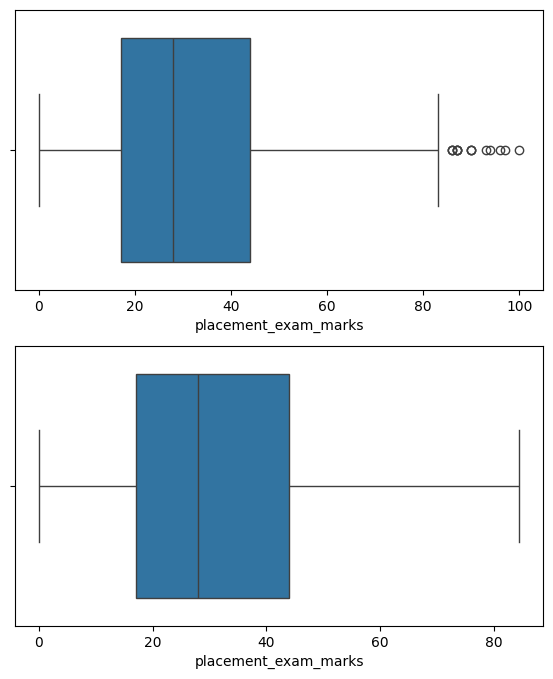

In [ ]:
plt.figure(figsize = (15,8))

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks' ])

plt.subplot(224)
sns.boxplot(x=new_df_cap['placement_exam_marks'])
plt.show()

In [ ]:
#  Assign
# titanic dataset --> Age --> outliers --> check
# handle --> triming, capping

# Dataset 2


In [ ]:
df = pd.read_csv("/content/titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df['Age'].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


<Axes: xlabel='Age'>

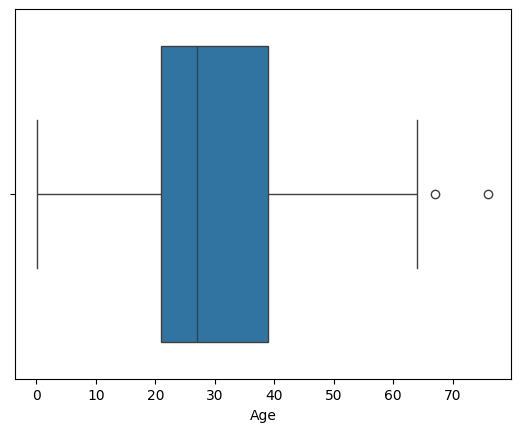

In [ ]:
sns.boxplot(x= df['Age'])

In [ ]:
# Finding the IQR

percentile25 = df[ 'Age'].quantile(0.25)
percentile75 = df[ 'Age'].quantile(0.75)

In [ ]:
percentile25

np.float64(21.0)

In [ ]:
percentile75

np.float64(39.0)

In [ ]:
IQR = percentile75 - percentile25
IQR

np.float64(18.0)

In [ ]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(66.0)

In [ ]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-6.0)

# Finding Outliers

In [ ]:
df[df['Age'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [ ]:
df[df['Age'] < lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# Trimming (outlier Removing techniques 1)

In [ ]:
newdf = df[df['Age'] > upper_limit]

In [ ]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


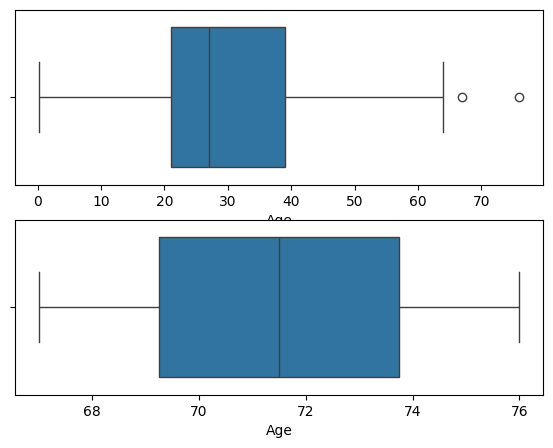

In [ ]:
# comparison

plt.figure(figsize = (15,5))

plt.subplot (222)
sns.boxplot(x = df['Age'])

plt.subplot (224)
sns.boxplot(x = newdf['Age'])
plt.show()

In [ ]:
# capping (Outlier Removing technique 2)

In [ ]:
new_df_cap = df.copy()

In [ ]:
new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit ,
    upper_limit ,

    np.where(
    new_df_cap['Age'] < lower_limit,
    lower_limit ,
    new_df_cap['Age'])
)

In [ ]:
new_df_cap

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
new_df_cap.shape

(418, 12)

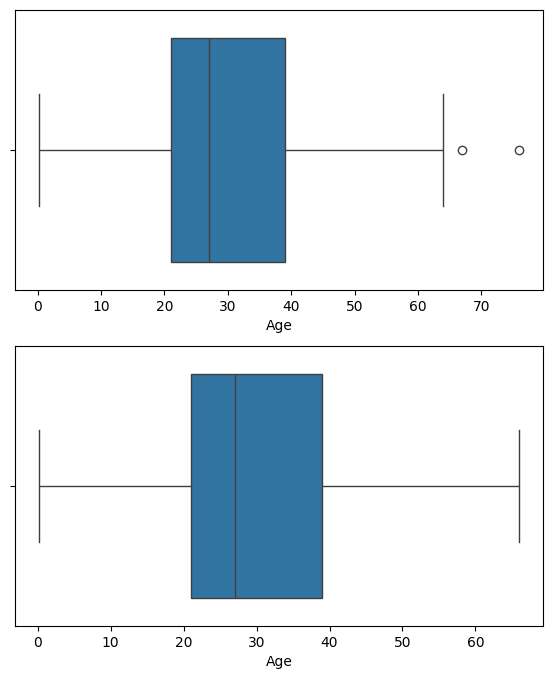

In [ ]:
plt.figure(figsize = (15,8))

plt.subplot(222)
sns.boxplot(x=df['Age' ])

plt.subplot(224)
sns.boxplot(x=new_df_cap['Age'])
plt.show()